In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from xgboost import plot_importance

from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

In [2]:
df_raw = pd.read_csv('features_cleaned_not_standardized.csv').drop(['Sex','Age'], axis=1)
df_raw

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Species,Call
0,CL-Prusten-1,Panther Ridge Conservation Center,1,3063,0.089285,0.009212,5211.000000,1297.000000,-10.538667,4104.766846,0.027798,21.335496,0.772971,0.105037,0.000544,5,0.011874,Clouded leopard,prusten
1,CL-Prusten-1,Panther Ridge Conservation Center,1,3827,0.916883,0.017625,5701.000000,1941.000000,-11.723422,3475.899436,0.147693,22.327656,0.711248,0.140300,-0.002539,8,0.026328,Clouded leopard,prusten
2,CL-Prusten-1,Panther Ridge Conservation Center,1,3527,0.113353,0.006644,5817.000000,1178.000000,-12.913638,4169.855846,0.025814,21.350530,0.787256,0.107705,-0.007710,1,0.009158,Clouded leopard,prusten
3,CL-Prusten-1,Panther Ridge Conservation Center,1,3258,0.085254,0.004369,3129.000000,774.000000,-13.866606,4365.367543,0.009147,21.504673,0.696388,0.109876,-0.024684,4,0.005881,Clouded leopard,prusten
4,CL-Prusten-1,Panther Ridge Conservation Center,1,3424,0.228637,0.017536,10269.000000,1399.000000,-11.798061,4617.403897,0.206831,21.006766,0.694314,0.080068,0.005246,8,0.022758,Clouded leopard,prusten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Lion Roaring Sequence_17,YouTube,40,22436,0.652970,0.073732,10092.625000,295.250000,-4.387553,1458.415228,3.050521,20.184006,0.580697,0.190296,-0.000172,85,0.088674,Lion,roar
121,Lion Roaring Sequence_18,YouTube,45,127303,1.039453,0.117559,10681.044444,1159.066667,-5.522057,4116.969550,12.378446,20.695561,0.593314,0.184751,0.001714,139,0.141392,Lion,roar
122,Lion Roaring Sequence_18,YouTube,17,32072,1.021872,0.181167,10494.470588,898.411765,-3.991339,3033.963691,24.540840,20.218510,0.616647,0.182995,-0.004780,98,0.219604,Lion,roar
123,Lion Roaring Sequence_19,YouTube,19,23112,0.747216,0.123384,5462.315789,315.631579,-5.297592,2002.811373,9.278934,21.174380,0.515771,0.224227,0.006657,38,0.142555,Lion,roar


In [3]:
df_raw.groupby('Call').describe().to_csv('Table for journal2.csv')
df_raw

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Species,Call
0,CL-Prusten-1,Panther Ridge Conservation Center,1,3063,0.089285,0.009212,5211.000000,1297.000000,-10.538667,4104.766846,0.027798,21.335496,0.772971,0.105037,0.000544,5,0.011874,Clouded leopard,prusten
1,CL-Prusten-1,Panther Ridge Conservation Center,1,3827,0.916883,0.017625,5701.000000,1941.000000,-11.723422,3475.899436,0.147693,22.327656,0.711248,0.140300,-0.002539,8,0.026328,Clouded leopard,prusten
2,CL-Prusten-1,Panther Ridge Conservation Center,1,3527,0.113353,0.006644,5817.000000,1178.000000,-12.913638,4169.855846,0.025814,21.350530,0.787256,0.107705,-0.007710,1,0.009158,Clouded leopard,prusten
3,CL-Prusten-1,Panther Ridge Conservation Center,1,3258,0.085254,0.004369,3129.000000,774.000000,-13.866606,4365.367543,0.009147,21.504673,0.696388,0.109876,-0.024684,4,0.005881,Clouded leopard,prusten
4,CL-Prusten-1,Panther Ridge Conservation Center,1,3424,0.228637,0.017536,10269.000000,1399.000000,-11.798061,4617.403897,0.206831,21.006766,0.694314,0.080068,0.005246,8,0.022758,Clouded leopard,prusten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Lion Roaring Sequence_17,YouTube,40,22436,0.652970,0.073732,10092.625000,295.250000,-4.387553,1458.415228,3.050521,20.184006,0.580697,0.190296,-0.000172,85,0.088674,Lion,roar
121,Lion Roaring Sequence_18,YouTube,45,127303,1.039453,0.117559,10681.044444,1159.066667,-5.522057,4116.969550,12.378446,20.695561,0.593314,0.184751,0.001714,139,0.141392,Lion,roar
122,Lion Roaring Sequence_18,YouTube,17,32072,1.021872,0.181167,10494.470588,898.411765,-3.991339,3033.963691,24.540840,20.218510,0.616647,0.182995,-0.004780,98,0.219604,Lion,roar
123,Lion Roaring Sequence_19,YouTube,19,23112,0.747216,0.123384,5462.315789,315.631579,-5.297592,2002.811373,9.278934,21.174380,0.515771,0.224227,0.006657,38,0.142555,Lion,roar


In [4]:
df = pd.read_csv('features_cleaned.csv')
df

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
0,Jaguar-Prusten-1,YouTube,-0.910261,-0.795113,-0.026289,-0.340803,-0.421387,0.841685,1.678653,0.602295,-0.308698,-0.960260,1.658664,-1.111745,-0.286268,-0.542962,-0.351621,Unknown,Unknown,Jaguar,prusten
1,Jaguar-Prusten-1,YouTube,-0.910261,-0.731692,-1.835643,-1.096620,-0.806636,-0.149255,-1.135978,1.755714,-0.536585,-1.536667,1.649726,-0.907964,-1.106560,-0.819205,-1.141334,Unknown,Unknown,Jaguar,prusten
2,Jaguar-Prusten-1,YouTube,-0.910261,-0.796018,-2.008571,-1.128298,-2.590927,-1.092495,-0.658015,1.380373,-0.537662,-1.897691,2.147499,-0.637609,-0.447219,-0.837621,-1.176774,Unknown,Unknown,Jaguar,prusten
3,Jaguar-Prusten-1,YouTube,-0.910261,-0.800061,-1.848767,-1.045017,-2.608628,-1.110959,-0.088006,0.894245,-0.533509,-1.426091,1.201418,-1.004796,-1.124444,-0.837621,-1.091462,Unknown,Unknown,Jaguar,prusten
4,Jaguar-Prusten-1,YouTube,-0.910261,-0.827098,-1.798203,-0.940222,-0.861820,-0.517011,1.124259,0.839965,-0.530097,-1.198614,1.147553,-1.176638,1.237532,-0.837621,-0.994099,Unknown,Unknown,Jaguar,prusten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,CL-Prusten-1,Panther Ridge Conservation Center,0.000000,0.635885,-0.487616,-0.603396,-0.019195,-0.015400,-0.294678,0.182709,-0.621020,-0.223790,1.130458,-0.231528,-0.457972,-1.078328,-0.570986,Female,Juvenile,Clouded leopard,prusten
121,CL-Prusten-1,Panther Ridge Conservation Center,0.000000,-0.098248,-0.581848,-1.011123,-1.262502,-0.904174,-1.021838,0.726412,-0.840529,0.138953,-1.090032,-0.118517,-1.726786,-0.107833,-0.981823,Female,Juvenile,Clouded leopard,prusten
122,CL-Prusten-1,Panther Ridge Conservation Center,0.000000,0.354785,-0.101002,1.348599,2.040031,0.470786,0.556562,1.427305,1.763022,-1.032765,-1.140717,-1.670548,0.510505,1.186161,1.134059,Female,Juvenile,Clouded leopard,prusten
123,CL-Prusten-1,Panther Ridge Conservation Center,0.000000,-1.716615,-0.468283,-0.955309,-0.385989,-1.460757,-1.371102,-0.590996,-0.690747,-0.698894,1.045821,0.925477,1.586653,-1.401826,-0.932431,Female,Juvenile,Clouded leopard,prusten


In [5]:
df.shape

(125, 21)

In [6]:
df.columns

Index(['File Name', 'Source', 'Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS', 'Sex', 'Age', 'Species',
       'Call'],
      dtype='object')

In [7]:
X = df[pd.notnull(df['Call'])][['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Mean RMS']]
y = df[pd.notnull(df['Call'])][['Call','Species']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87, 14)
(38, 14)
(87, 2)
(38, 2)


In [10]:
print('Total Species values')
print(df['Species'].value_counts())
print('\n')
print('Species values for Training')
print(y_train.Species.value_counts())
print('\n')
print('Species values for Testing')
print(y_test.Species.value_counts())

Total Species values
Leopard            41
Lion               33
Clouded leopard    29
Jaguar             22
Name: Species, dtype: int64


Species values for Training
Leopard            26
Lion               25
Clouded leopard    22
Jaguar             14
Name: Species, dtype: int64


Species values for Testing
Leopard            15
Jaguar              8
Lion                8
Clouded leopard     7
Name: Species, dtype: int64


In [11]:
print('Total Call Values')
print(df['Call'].value_counts())
print('\n')
print('Call values for Training')
print(y_train.Call.value_counts())
print('\n')
print('Call values for Testing')
print(y_test.Call.value_counts())

Total Call Values
roar       65
prusten    40
growl      20
Name: Call, dtype: int64


Call values for Training
roar       43
prusten    30
growl      14
Name: Call, dtype: int64


Call values for Testing
roar       22
prusten    10
growl       6
Name: Call, dtype: int64


In [12]:
print('Species trained for but not tested for')
print(set(np.unique(y_train.Species))-set(np.unique(y_test.Species)))
print('Species test for but not trained for')
print(set(np.unique(y_test.Species))-set(np.unique(y_train.Species)))

Species trained for but not tested for
set()
Species test for but not trained for
set()


# Vocalization Classification

## Splitting data

In [13]:
y_train_call = y_train.Call
y_test_call = y_test.Call

In [14]:
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [15]:
#SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train_call)
print('SVM',svm.score(X_test,y_test_call))

#XGBoost
xgb = XGBClassifier(n_estimators=1200, eval_metric='mlogloss')
xgb.fit(X_train, y_train_call)
print('XGB',xgb.score(X_test,y_test_call))

#LGB
lgb = lgb.LGBMClassifier()
lgb.fit(X_train, y_train_call)
print('LBG',lgb.score(X_test,y_test_call))

#LR
lr = LogisticRegression(solver='liblinear', multi_class='ovr',class_weight="balanced")
lr.fit(X_train, y_train_call)
print('LR',lr.score(X_test,y_test_call))

#RF
rf = RandomForestClassifier()
rf.fit(X_train, y_train_call)
print('RF',lr.score(X_test,y_test_call))

#DT
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train_call)
print('DT',dt.score(X_test,y_test_call))

#KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train_call)
print('KNN',knn.score(X_test,y_test_call))

#NN
nn = MLPClassifier(max_iter=1000)
nn.fit(X_train, y_train_call)
print('NN',nn.score(X_test,y_test_call))

SVM 0.7368421052631579
XGB 0.8947368421052632
LBG 0.8157894736842105
LR 0.7368421052631579
RF 0.7368421052631579
DT 0.7894736842105263
KNN 0.7894736842105263
NN 0.8421052631578947


### Confusion Matrix

#### Best performing model tuned for increased accuracy

In [16]:
clf1 = XGBClassifier(
    n_estimators=1200,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist', 
    eval_metric='mlogloss')

In [17]:
clf1.fit(X_train, y_train_call)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='mlogloss',
              gamma=0, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1200, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [18]:
clf1.score(X_test, y_test_call)

0.9210526315789473

In [19]:
y_clf1 = clf1.predict(X_test)
prob_clf1 = clf1.predict_proba(X_test)

In [20]:
print('1. Tested Calls')
print(np.unique(y_test_call))
print('2. Predicted Calls')
print(np.unique(y_clf1))
print('3. Not tested for but predicted')
print(set(np.unique(y_clf1))-set(np.unique(y_test_call)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test_call))-set(np.unique(y_clf1)))

1. Tested Calls
['growl' 'prusten' 'roar']
2. Predicted Calls
['growl' 'prusten' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


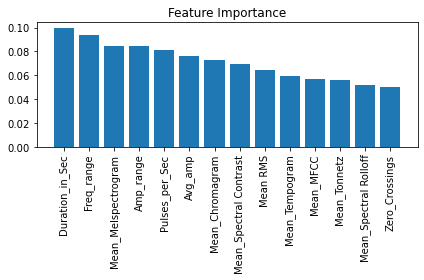

In [21]:
importances = clf1.feature_importances_
imp = np.argsort(importances)[::-1]


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[imp], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[imp], rotation=90)
plt.tight_layout()
plt.savefig('Feature Importance in Call Classification With XGBoost.png')
plt.show()

Accuracy 0.9210526315789473


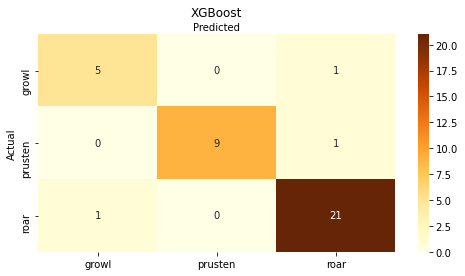

In [22]:
names_rf = sorted(list(set(np.unique(y_test_call)).union(set(y_clf1))))
cnf = confusion_matrix(y_test_call, y_clf1)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',clf1.score(X_test, y_test_call))

sns.heatmap(cnf, annot=True, xticklabels=names_rf, yticklabels=names_rf,cmap= "YlOrBr")
plt.title('XGBoost')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('Confusion_Matrix_Call_XGBoost.png')
plt.show(block=False)


### ROC Curve

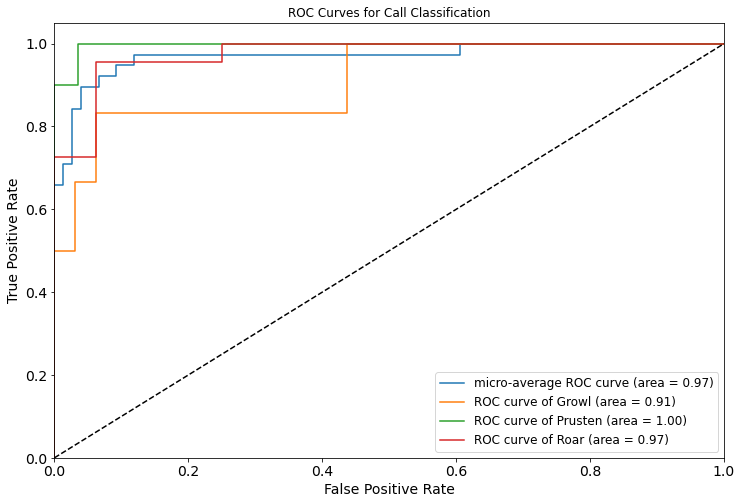

0.8157894736842105


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

df = pd.read_csv('features_cleaned.csv')

X = df[pd.notnull(df['Call'])][['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Mean RMS']]
df['Call'] = df['Call'].astype('category')
df['Call'] = df['Call'].cat.codes
y = df[pd.notnull(df['Call'])]['Call']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(XGBClassifier(
    n_estimators=1200,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist', 
    eval_metric='mlogloss'))
# objective='multi:softprob'
y_score = classifier.fit(X_train_roc, y_train_roc).predict_proba(X_test_roc)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Call Classification')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

L = plt.legend(loc="lower right", prop={'size': 12})


L.get_texts()[1].set_text('ROC curve of Growl (area = 0.91)')
L.get_texts()[2].set_text('ROC curve of Prusten (area = 1.00)')
L.get_texts()[3].set_text('ROC curve of Roar (area = 0.97)')


plt.savefig('ROC_Curve_Call_XGBoost.png')
plt.show()

print(classifier.score(X_test_roc, y_test_roc))


### Stratified K Fold Cross Validation

In [24]:
skf = StratifiedKFold(n_splits=10)
model = XGBClassifier(
    n_estimators=1200,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist', 
    eval_metric='mlogloss')

x = df[pd.notnull(df['Call'])][['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Mean RMS']]
y = df[pd.notnull(df['Call'])][['Call']]

lst_accu_stratified = []

def training(train, test, fold_no):
  x_train = train.drop(['Call','File Name','Source','Partials','Sex','Age','Species'],axis=1)
  y_train = train.Call
  x_test = test.drop(['Call','File Name','Source','Partials','Sex','Age','Species'],axis=1)
  y_test = test.Call
  model.fit(x_train, y_train)
  score = model.score(x_test,y_test)
  lst_accu_stratified.append(score)

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = df.iloc[train_index,:]
  test = df.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
    
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nAverage Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation:', stdev(lst_accu_stratified))

List of possible accuracy: [0.6153846153846154, 0.9230769230769231, 0.8461538461538461, 0.7692307692307693, 1.0, 1.0, 0.75, 0.6666666666666666, 0.75, 0.4166666666666667]

Maximum Accuracy: 100.0 %

Minimum Accuracy: 41.66666666666667 %

Average Accuracy: 77.37179487179488 %

Standard Deviation: 0.18108391312500854


# Species Classification

In [25]:
X = df[pd.notnull(df['Call'])][['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Mean RMS']]
y = df[pd.notnull(df['Call'])][['Call','Species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

## Splitting data

In [26]:
y_train_species = y_train.Species
y_test_species = y_test.Species

In [27]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [28]:
#SVM
svm2 = SVC(probability=True)
svm2.fit(X_train, y_train_species)
print('SVM',svm2.score(X_test,y_test_species))

#XGBoost
xgb2 = XGBClassifier(n_estimators=1200, eval_metric='mlogloss')
xgb2.fit(X_train, y_train_species)
print('XGB',xgb2.score(X_test,y_test_species))

import lightgbm as lgb
#LGB
lgb2 = lgb.LGBMClassifier()
lgb2.fit(X_train, y_train_species)
print('LBG',lgb2.score(X_test,y_test_species))

#LR
lr2 = LogisticRegression(solver='liblinear', multi_class='ovr',class_weight="balanced")
lr2.fit(X_train, y_train_species)
print('LR',lr2.score(X_test,y_test_species))

#RF
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train_species)
print('RF',lr2.score(X_test,y_test_species))

#DT
dt2 = DecisionTreeClassifier()
dt2.fit(X_train, y_train_species)
print('DT',dt2.score(X_test,y_test_species))

#KNN
knn2 = KNeighborsClassifier(n_neighbors=4)
knn2.fit(X_train, y_train_species)
print('KNN',knn2.score(X_test,y_test_species))

from sklearn.neural_network import MLPClassifier
#NN
nn2 = MLPClassifier(max_iter=1500, activation= 'relu', alpha= 0.05, hidden_layer_sizes= (50, 50, 50),
                    learning_rate= 'adaptive', solver= 'adam')
nn2.fit(X_train, y_train_species)
print('NN',nn2.score(X_test,y_test_species))

SVM 0.6052631578947368
XGB 0.7894736842105263
LBG 0.7105263157894737
LR 0.5263157894736842
RF 0.5263157894736842
DT 0.7631578947368421
KNN 0.6842105263157895
NN 0.5789473684210527


### Confusion Matrix

#### Best performing model tuned for increased accuracy

In [29]:
clf2 = XGBClassifier(
    n_estimators=1200,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist', 
    eval_metric='mlogloss')

In [30]:
clf2.fit(X_train, y_train_species)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='mlogloss',
              gamma=0, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1200, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [31]:
clf2.score(X_test, y_test_species)

0.8157894736842105

In [32]:
y_clf2 = clf2.predict(X_test)
prob_clf2 = clf2.predict_proba(X_test)

In [33]:
print('1. Tested Calls')
print(np.unique(y_test_species))
print('2. Predicted Calls')
print(np.unique(y_clf2))
print('3. Not tested for but predicted')
print(set(np.unique(y_clf1))-set(np.unique(y_test_species)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test_species))-set(np.unique(y_clf1)))

1. Tested Calls
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
2. Predicted Calls
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
3. Not tested for but predicted
{'growl', 'prusten', 'roar'}
4. Tested for but not predicted
{'Jaguar', 'Leopard', 'Clouded leopard', 'Lion'}


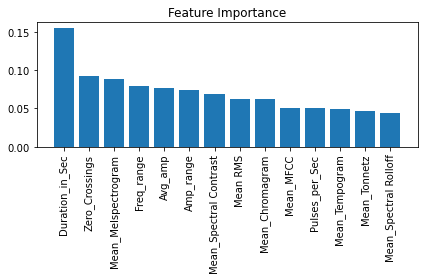

In [34]:
importances = clf2.feature_importances_
imp = np.argsort(importances)[::-1]


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[imp], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[imp], rotation=90)
plt.tight_layout()
plt.savefig('Feature Importance in Species Classification With XGBoost.png')
plt.show()

Accuracy 0.8157894736842105


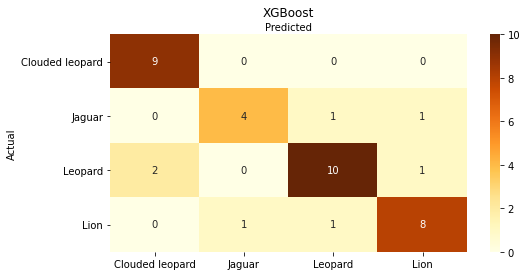

In [35]:
names_rf = sorted(list(set(np.unique(y_test_species)).union(set(y_clf2))))
cnf = confusion_matrix(y_test_species, y_clf2)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',clf2.score(X_test, y_test_species))

sns.heatmap(cnf, annot=True, xticklabels=names_rf, yticklabels=names_rf,cmap= "YlOrBr")
plt.title('XGBoost')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('Confusion_Matrix_Species_XGBoost.png')
plt.show(block=False)


### ROC Curve

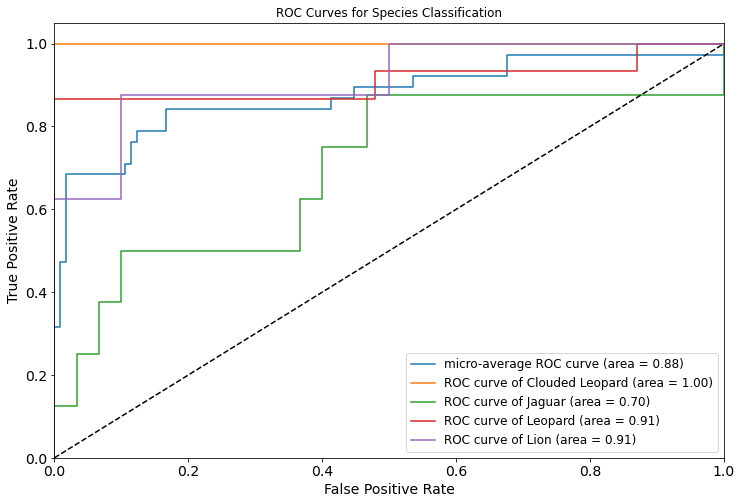

0.6578947368421053


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

df = pd.read_csv('features_cleaned.csv')

X = df[pd.notnull(df['Call'])][['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Mean RMS']]
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes
y = df[pd.notnull(df['Call'])]['Species']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X, y, test_size=0.30, random_state=42)



# Learn to predict each class against the other
classifier = OneVsRestClassifier(XGBClassifier(n_estimators=1200,
    max_depth=9,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist', 
    eval_metric='mlogloss'))
y_score = classifier.fit(X_train_roc, y_train_roc).predict_proba(X_test_roc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Species Classification')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

L = plt.legend(loc="lower right", prop={'size': 12})


L.get_texts()[1].set_text('ROC curve of Clouded Leopard (area = 1.00)')
L.get_texts()[2].set_text('ROC curve of Jaguar (area = 0.70)')
L.get_texts()[3].set_text('ROC curve of Leopard (area = 0.91)')
L.get_texts()[4].set_text('ROC curve of Lion (area = 0.91)')


plt.savefig('ROC_Curve_Species_XGBoost.png')
plt.show()
print(classifier.score(X_test_roc, y_test_roc))

### Stratified K Fold Cross Validation

In [37]:
skf = StratifiedKFold(n_splits=10)
model = XGBClassifier(n_estimators=1200,
    max_depth=9,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist', 
    eval_metric='mlogloss')

x = df[pd.notnull(df['Call'])][['Duration_in_Sec', 'Zero_Crossings', 'Amp_range','Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC','Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram', 'Mean_Tonnetz', 'Mean RMS']]
y = df[pd.notnull(df['Call'])][['Species']]

lst_accu_stratified = []

def training(train, test, fold_no):
  x_train = train.drop(['Call','File Name','Source','Partials','Sex','Age','Species'],axis=1)
  y_train = train.Call
  x_test = test.drop(['Call','File Name','Source','Partials','Sex','Age','Species'],axis=1)
  y_test = test.Call
  model.fit(x_train, y_train)
  score = model.score(x_test,y_test)
  lst_accu_stratified.append(score)

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = df.iloc[train_index,:]
  test = df.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
    
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nAverage Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation:', stdev(lst_accu_stratified))

List of possible accuracy: [0.6153846153846154, 0.5384615384615384, 0.7692307692307693, 1.0, 0.8461538461538461, 0.9166666666666666, 0.8333333333333334, 0.75, 0.75, 0.8333333333333334]

Maximum Accuracy: 100.0 %

Minimum Accuracy: 53.84615384615385 %

Average Accuracy: 78.52564102564102 %

Standard Deviation: 0.13508093422733863
